In [235]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [236]:
data=pd.read_csv('C:\\Users\\rawat\\OneDrive\\Desktop\\DA\\Handson\\new_insurance_data.csv')

In [237]:
data.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [239]:
data.isna().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [240]:
data.duplicated().sum()

0

In [241]:
data.dropna(inplace=True)

In [242]:
data.isna().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

In [243]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1287.0,3.941958e+01,1.405199e+01,1.800000e+01,2.700000e+01,4.000000e+01,5.100000e+01,6.400000e+01
bmi,1287.0,3.065575e+01,6.086323e+00,1.596000e+01,2.622000e+01,3.036000e+01,3.460000e+01,5.313000e+01
children,1287.0,1.094794e+00,1.202782e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00
Claim_Amount,1287.0,3.349858e+04,1.561172e+04,2.912591e+03,2.090597e+04,3.396877e+04,4.515241e+04,7.727799e+04
past_consultations,1287.0,1.524709e+01,7.457366e+00,1.000000e+00,9.000000e+00,1.500000e+01,2.000000e+01,4.000000e+01
num_of_steps,1287.0,9.113778e+05,9.083364e+04,6.991570e+05,8.489270e+05,9.152840e+05,9.726140e+05,1.107872e+06
Hospital_expenditure,1287.0,1.579929e+07,2.653821e+07,2.945253e+04,4.114357e+06,7.567064e+06,1.093014e+07,2.616317e+08
NUmber_of_past_hospitalizations,1287.0,1.068376e+00,5.290789e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
Anual_Salary,1287.0,3.727972e+08,5.655770e+08,3.150786e+06,7.964523e+07,1.451129e+08,3.337660e+08,4.117197e+09
charges,1287.0,1.336607e+04,1.202582e+04,1.121874e+03,4.842251e+03,9.549565e+03,1.696413e+04,6.377043e+04


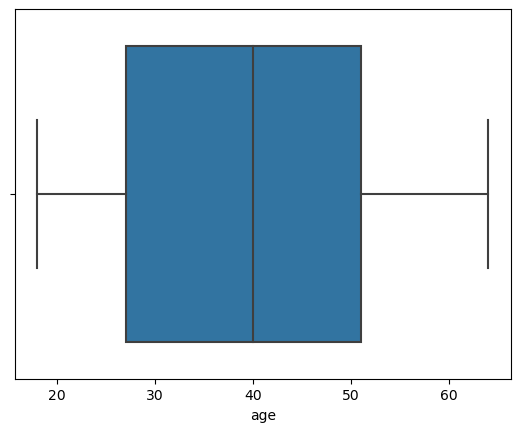

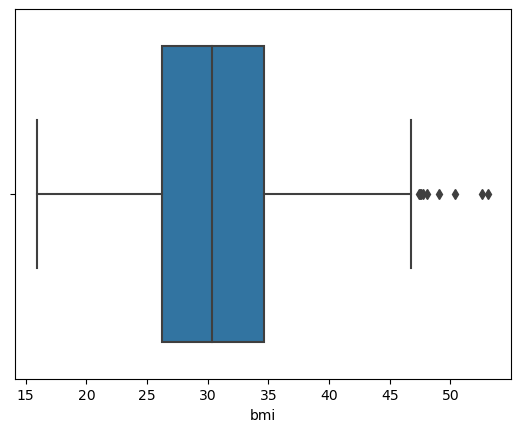

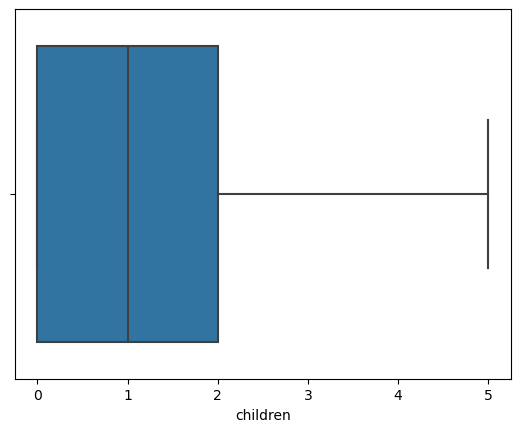

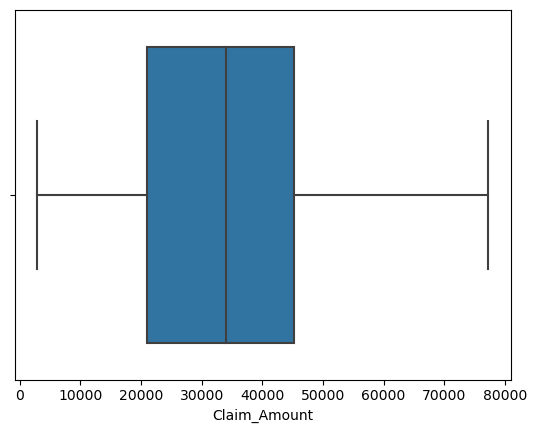

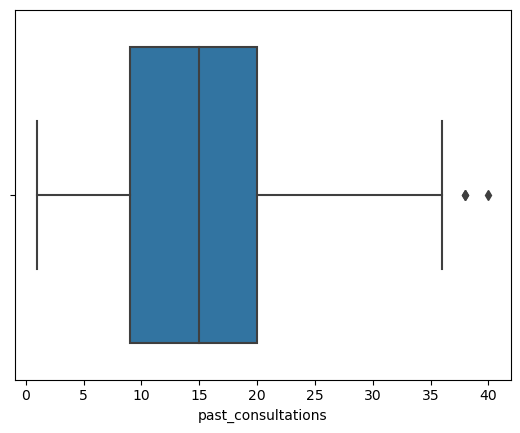

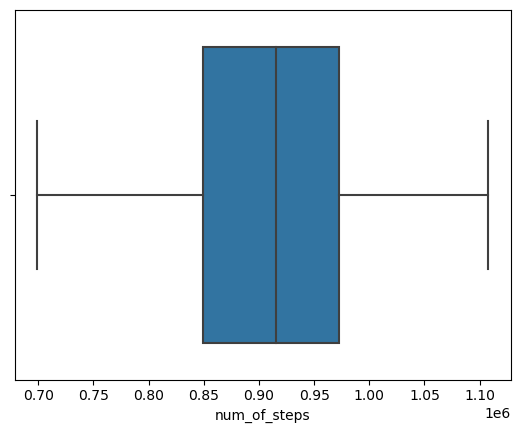

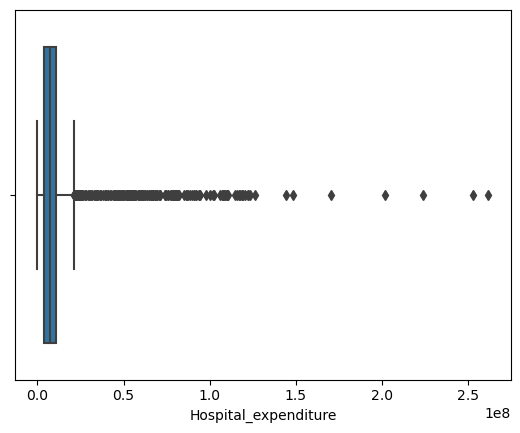

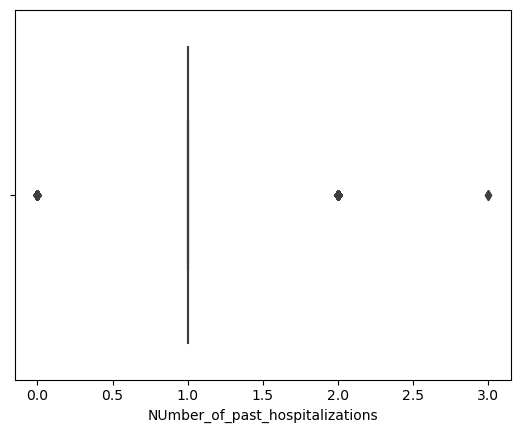

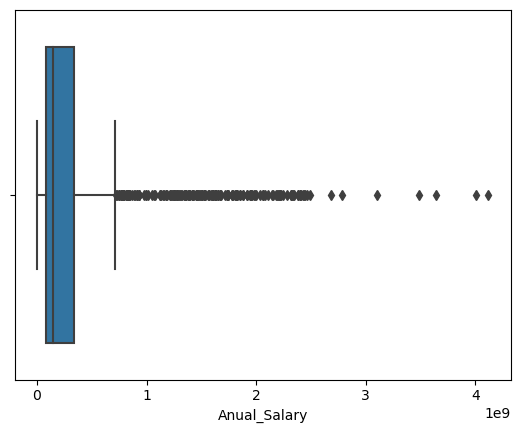

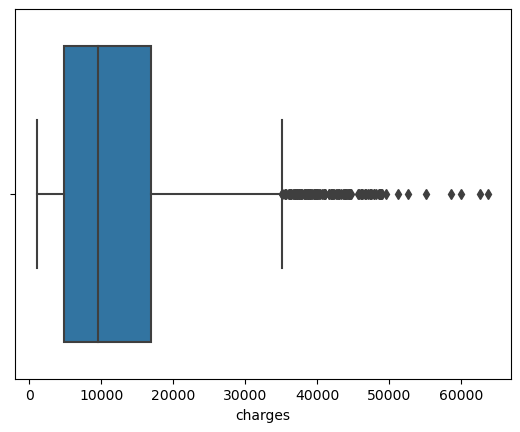

In [244]:
for i in data.columns:
    if data[i].dtypes!='object':
        sns.boxplot(x=i, data=data)
        plt.show()

In [245]:
a={}

for i in data.columns:
    if data[i].dtypes!='object':
        Q1 = data[i].quantile(0.25)
        Q3 = data[i].quantile(0.75)
        iqr = Q3-Q1
        UL = Q3+(1.5*iqr)
        LL = Q1 - (1.5*iqr)
        a[i]=[UL,LL]
        data[i] = data[i][(data[i]>LL) & (data[i]<UL)]
    

    

In [215]:
a={}
b=['a','b','c','d']
for i in b:
    UL=1
    L=[0,1]
    if i in a:
        a[i].append(UL)
        
    else:
        a[i]=LL
    
print(a)

{'a': -13340.570987500003, 'b': -13340.570987500003, 'c': -13340.570987500003, 'd': -13340.570987500003}


In [246]:
data.isna().sum()

age                                   0
sex                                   0
bmi                                   9
children                             16
smoker                                0
Claim_Amount                          0
past_consultations                    3
num_of_steps                          0
Hospital_expenditure                195
NUmber_of_past_hospitalizations    1287
Anual_Salary                        186
region                                0
charges                             125
dtype: int64

In [247]:
data.drop('NUmber_of_past_hospitalizations', axis = 1,inplace = True )

In [250]:
data.dropna(inplace=True)

In [251]:
data.isna().sum()

age                     0
sex                     0
bmi                     0
children                0
smoker                  0
Claim_Amount            0
past_consultations      0
Hospital_expenditure    0
Anual_Salary            0
region                  0
charges                 0
dtype: int64

<Axes: >

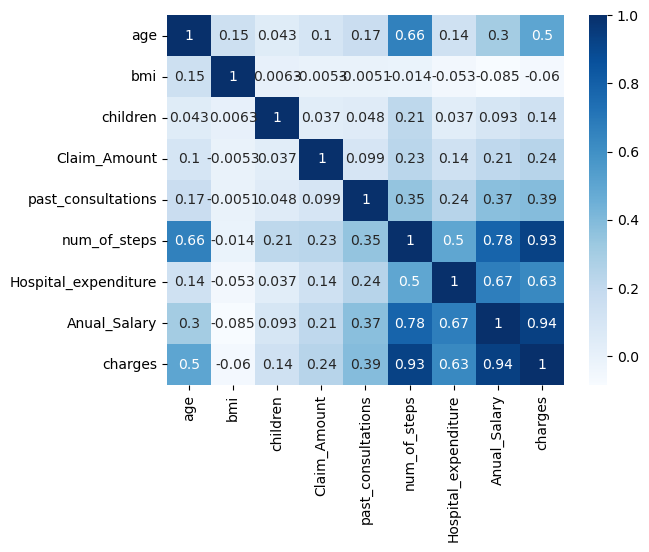

In [186]:
sns.heatmap(data.corr(numeric_only=True),annot = True, cmap = 'Blues')

In [248]:
data.drop('num_of_steps', axis = 1,inplace = True )

In [160]:
data.dropna(inplace=True)

In [252]:
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()

In [253]:
data['sex']=la.fit_transform(data['sex'])

In [254]:
data['smoker']=la.fit_transform(data['smoker'])

In [255]:
data['region']=la.fit_transform(data['region'])

In [256]:
y=data['charges']
x=data.drop('charges', axis=1)

In [257]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1067 entries, 0 to 1142
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1067 non-null   float64
 1   sex                   1067 non-null   int32  
 2   bmi                   1067 non-null   float64
 3   children              1067 non-null   float64
 4   smoker                1067 non-null   int32  
 5   Claim_Amount          1067 non-null   float64
 6   past_consultations    1067 non-null   float64
 7   Hospital_expenditure  1067 non-null   float64
 8   Anual_Salary          1067 non-null   float64
 9   region                1067 non-null   int32  
dtypes: float64(7), int32(3)
memory usage: 79.2 KB


In [258]:
from sklearn.model_selection import train_test_split

In [259]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8, random_state = 40)

In [260]:
from sklearn.linear_model import LinearRegression

In [261]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [262]:
pred = model.predict(x_test)

In [263]:
from sklearn.metrics import r2_score

In [264]:
r2_score(y_test,pred)

0.9340329338033566